In [1]:
# Importing required python libraries for data manpulation 
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Loading the dataset 
train_data = pd.read_csv('./data/train.csv')
test_data = pd.read_csv('./data/test.csv')

In [3]:
train_data.head()

,ID,Datetime,Sensor1_PM2.5,Sensor2_PM2.5,Temperature,Relative_Humidity,Offset_fault
0,ID_QF0ZTQJ2SF5Q,2021-11-03 04:06:31,52.58,49.52,17.4,96.0,0
1,ID_4GTK689CNX5S,2021-11-08 18:43:23,35.25,33.40,25.0,75.0,0
2,ID_DL7VVKW9U7XQ,2021-11-07 09:50:33,19.18,23.50,24.9,75.0,0
3,ID_6XQOMBXM2DG3,2022-01-01 18:55:15,19.40,15.48,24.9,70.0,0
4,ID_UQZW9ISJY9QE,2021-11-05 22:23:48,38.30,34.77,20.9,89.0,0


In [4]:
train_data.tail()

,ID,Datetime,Sensor1_PM2.5,Sensor2_PM2.5,Temperature,Relative_Humidity,Offset_fault
297172,ID_AQFTZIKVX2QL,2021-11-19 12:32:00,36.40,37.77,28.6,62.0,0
297173,ID_2X0AJPWOMJNA,2021-11-22 01:22:54,50.12,40.63,21.6,86.0,1
297174,ID_0OAQMV7USTI4,2021-11-05 01:27:31,53.68,45.23,20.2,94.0,1
297175,ID_Y8FDAO06VXGJ,2021-11-23 22:09:30,96.45,114.67,20.6,93.0,0
297176,ID_3XEXH72VWK4J,2021-11-23 06:33:04,44.27,36.77,17.3,95.0,1


In [5]:
# Describe the data to get  statistical information about the dataset in use in terms of mean, median 
train_data.describe()

,Sensor1_PM2.5,Sensor2_PM2.5,Temperature,Relative_Humidity,Offset_fault
count,293563.000000,293563.000000,293628.000000,293628.000000,297177.000000
mean,40.751195,38.183018,23.316554,78.653623,0.371072
std,28.526182,28.647761,3.836971,14.772725,0.483092
min,-9.450000,-9.700000,16.700000,27.000000,0.000000
25%,22.430000,19.520000,20.400000,68.000000,0.000000
50%,36.470000,33.720000,21.900000,84.000000,0.000000
75%,49.420000,47.570000,26.300000,91.000000,1.000000
max,997.960000,997.260000,34.900000,99.000000,1.000000


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297177 entries, 0 to 297176
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ID                 297177 non-null  object 
 1   Datetime           297177 non-null  object 
 2   Sensor1_PM2.5      293563 non-null  float64
 3   Sensor2_PM2.5      293563 non-null  float64
 4   Temperature        293628 non-null  float64
 5   Relative_Humidity  293628 non-null  float64
 6   Offset_fault       297177 non-null  int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 15.9+ MB


# Data Preparation
Handling missing values in the dataset 

In [7]:
train_data.columns

Index(['ID', 'Datetime', 'Sensor1_PM2.5', 'Sensor2_PM2.5', 'Temperature',
       'Relative_Humidity', 'Offset_fault'],
      dtype='object')

In [8]:
train_data.rename(columns={
    'Sensor1_PM2.5':'Sensor1',
    'Sensor2_PM2.5':'Sensor2'
}, inplace=True)
train_data

,ID,Datetime,Sensor1,Sensor2,Temperature,Relative_Humidity,Offset_fault
0,ID_QF0ZTQJ2SF5Q,2021-11-03 04:06:31,52.58,49.52,17.4,96.0,0
1,ID_4GTK689CNX5S,2021-11-08 18:43:23,35.25,33.40,25.0,75.0,0
2,ID_DL7VVKW9U7XQ,2021-11-07 09:50:33,19.18,23.50,24.9,75.0,0
3,ID_6XQOMBXM2DG3,2022-01-01 18:55:15,19.40,15.48,24.9,70.0,0
4,ID_UQZW9ISJY9QE,2021-11-05 22:23:48,38.30,34.77,20.9,89.0,0
...,...,...,...,...,...,...,...
297172,ID_AQFTZIKVX2QL,2021-11-19 12:32:00,36.40,37.77,28.6,62.0,0
297173,ID_2X0AJPWOMJNA,2021-11-22 01:22:54,50.12,40.63,21.6,86.0,1
297174,ID_0OAQMV7USTI4,2021-11-05 01:27:31,53.68,45.23,20.2,94.0,1
297175,ID_Y8FDAO06VXGJ,2021-11-23 22:09:30,96.45,114.67,20.6,93.0,0


In [9]:
# Check for missing values within the dataset
train_data.isnull().sum()

ID                      0
Datetime                0
Sensor1              3614
Sensor2              3614
Temperature          3549
Relative_Humidity    3549
Offset_fault            0
dtype: int64

In [10]:
train_data[['Sensor1','Sensor2','Temperature', 'Relative_Humidity']].mean()

Sensor1              40.751195
Sensor2              38.183018
Temperature          23.316554
Relative_Humidity    78.653623
dtype: float64

In [11]:
# Applying the mean values for all the missing values in columns Sensor1_PM2.5, Sensor2_PM2.5 and Temperature
train_data['Sensor1'] = train_data['Sensor1'].fillna(train_data['Sensor1'].mean())
train_data['Sensor2'] =train_data['Sensor2'].fillna(train_data['Sensor2'].mean())
train_data['Temperature'] = train_data['Temperature'].fillna(train_data['Temperature'].mean())
train_data['Relative_Humidity']=train_data['Relative_Humidity'].fillna(train_data['Relative_Humidity'].mean())

In [12]:
train_data.isnull().sum()

ID                   0
Datetime             0
Sensor1              0
Sensor2              0
Temperature          0
Relative_Humidity    0
Offset_fault         0
dtype: int64

# Data Visualization

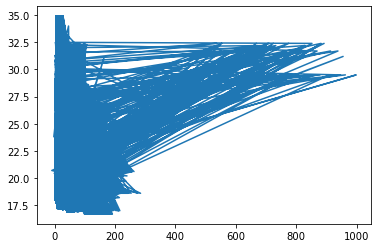

In [16]:
plt.plot(train_data.Sensor1, train_data.Temperature)
plt.show()

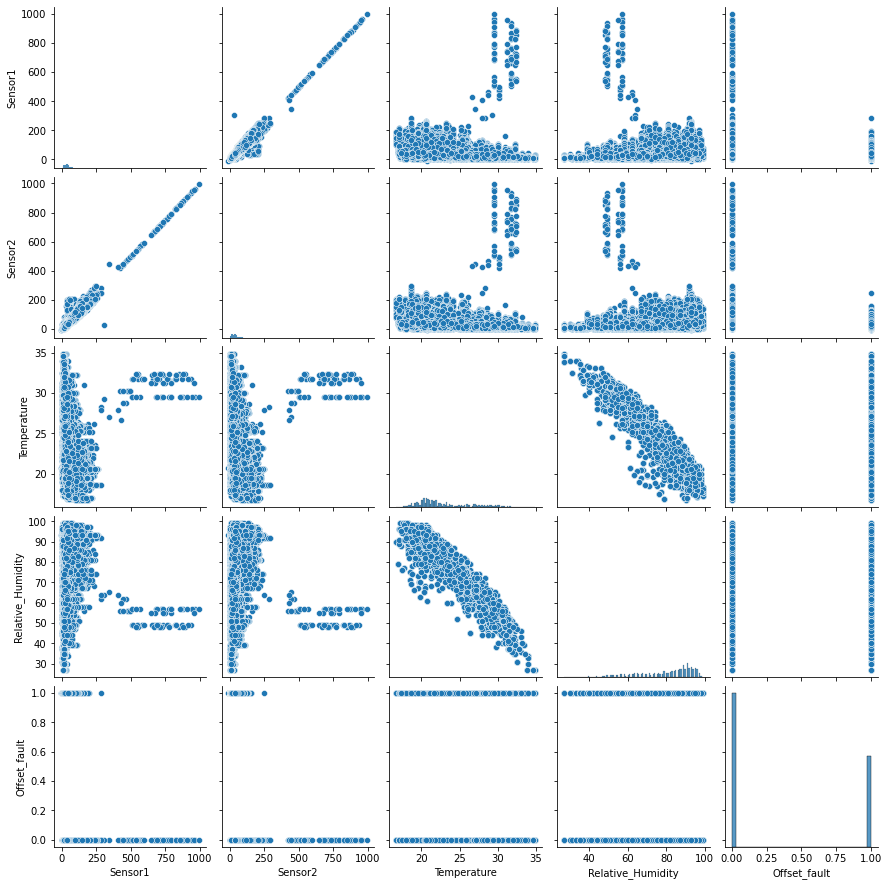

In [37]:
sns.pairplot(train_data)
plt.show()

In [20]:
train_data.columns

Index(['ID', 'Datetime', 'Sensor1', 'Sensor2', 'Temperature',
       'Relative_Humidity', 'Offset_fault'],
      dtype='object')

# Test Data Cleaning

In [25]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127361 entries, 0 to 127360
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ID                 127361 non-null  object 
 1   Datetime           127361 non-null  object 
 2   Sensor1_PM2.5      127361 non-null  float64
 3   Sensor2_PM2.5      127361 non-null  float64
 4   Temperature        39271 non-null   float64
 5   Relative_Humidity  39271 non-null   float64
dtypes: float64(4), object(2)
memory usage: 5.8+ MB


In [26]:
test_data.isnull().sum()

ID                       0
Datetime                 0
Sensor1_PM2.5            0
Sensor2_PM2.5            0
Temperature          88090
Relative_Humidity    88090
dtype: int64

In [27]:
test_data.rename(columns={
    'Sensor1_PM2.5':'Sensor1',
    'Sensor2_PM2.5':'Sensor2'
}, inplace=True)
test_data

,ID,Datetime,Sensor1,Sensor2,Temperature,Relative_Humidity
0,ID_STL3V9B2OU12,2022-01-28 08:49:41,90.75,114.78,22.2,56.0
1,ID_U2EKAY4SGA94,2022-02-16 21:30:17,56.03,52.18,NaN,NaN
2,ID_UJFLEWQR0U4N,2022-01-24 17:57:18,387.35,346.73,28.1,63.0
3,ID_S2C2GPGA4R5I,2022-01-31 07:07:09,63.17,83.85,21.6,82.0
4,ID_5V2C2ZL221H8,2022-01-31 00:37:05,69.23,53.07,22.7,80.0
...,...,...,...,...,...,...
127356,ID_HNCS9Q2GNCQB,2022-02-13 00:37:14,33.65,42.23,NaN,NaN
127357,ID_GIIQYTE11L3H,2022-03-09 16:26:42,21.23,15.72,NaN,NaN
127358,ID_EC7F1P4GXKCL,2022-02-18 14:47:28,41.45,47.25,NaN,NaN
127359,ID_J64RVG2BRAG0,2022-03-11 19:14:11,28.60,27.27,NaN,NaN


In [28]:
test_data['Temperature'] = test_data['Temperature'].fillna(test_data['Temperature'].mean())
test_data['Relative_Humidity']=test_data['Relative_Humidity'].fillna(test_data['Relative_Humidity'].mean())

In [29]:
test_data.isnull().sum()

ID                   0
Datetime             0
Sensor1              0
Sensor2              0
Temperature          0
Relative_Humidity    0
dtype: int64

#  First Model Development

In [19]:
# Importing of Machine learning models
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error 
from sklearn.neural_network import MLPClassifier

In [18]:
features = ['Sensor1', 'Sensor2', 'Temperature', 'Relative_Humidity']
X = train_data[features]

In [21]:
y = train_data.Offset_fault

In [23]:
# Split into validation and training data
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=1)

# Defing the model
train_model = RandomForestClassifier()



# Fit the model
train_model.fit(X_train, y_train)


# Make validation predictions and calculate mean absolute error
val_predictions = train_model.predict(X_val)
val_mae = mean_absolute_error(val_predictions, y_val)
acc_random_forest = round(train_model.score( X_train, y_train) * 100, 2)

In [24]:
print(round(acc_random_forest,2,), "%")

99.97 %


In [34]:
test_X = test_data[features]

In [32]:
train_model.fit(X, y)

RandomForestClassifier()

In [35]:
test_preds = train_model.predict(test_X)

In [36]:
submission0 = pd.DataFrame({'ID':test_data['ID'],'Offset_fault':test_preds})
submission0.to_csv('submission0.csv',index=False)
submission0.head()

,ID,Offset_fault
0,ID_STL3V9B2OU12,0
1,ID_U2EKAY4SGA94,0
2,ID_UJFLEWQR0U4N,0
3,ID_S2C2GPGA4R5I,0
4,ID_5V2C2ZL221H8,1
